In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [10]:
df = pd.read_csv('adult.csv')

In [11]:
df = df.sample(frac =.01) 


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 17232 to 5794
Data columns (total 15 columns):
age                488 non-null int64
workclass          488 non-null object
fnlwgt             488 non-null int64
education          488 non-null object
educational-num    488 non-null int64
marital-status     488 non-null object
occupation         488 non-null object
relationship       488 non-null object
race               488 non-null object
gender             488 non-null object
capital-gain       488 non-null int64
capital-loss       488 non-null int64
hours-per-week     488 non-null int64
native-country     488 non-null object
income             488 non-null object
dtypes: int64(6), object(9)
memory usage: 61.0+ KB


In [13]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
17232,43,Private,227065,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,43,United-States,>50K
14332,21,Private,249282,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,40,United-States,<=50K
18335,20,Private,170038,HS-grad,9,Never-married,Sales,Not-in-family,White,Female,0,0,40,United-States,<=50K
26646,33,Self-emp-not-inc,295621,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,25,United-States,>50K
38899,49,Private,190319,Bachelors,13,Married-spouse-absent,Adm-clerical,Not-in-family,Amer-Indian-Eskimo,Male,0,0,40,Philippines,<=50K


In [14]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [15]:
scaler = StandardScaler()
df[['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']] = scaler.fit_transform(df[['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week']])

In [16]:
df['income'].replace('>50K',1,inplace=True)

In [17]:
df['income'].replace('<=50K',0,inplace=True)

In [18]:
#df['workclass'].replace({'?':'others'}, inplace=True)
#df['workclass'] = df['workclass'].map({'?': 'others'})

In [19]:
df['workclass'].value_counts()

Private             340
Self-emp-not-inc     37
Local-gov            33
?                    25
State-gov            23
Self-emp-inc         19
Federal-gov          11
Name: workclass, dtype: int64

In [20]:
df['native-country'].value_counts()

United-States    444
Mexico            12
Germany            5
Jamaica            3
Cuba               3
Canada             3
?                  2
South              2
Haiti              1
El-Salvador        1
Iran               1
Philippines        1
Puerto-Rico        1
England            1
Nicaragua          1
Thailand           1
Vietnam            1
Poland             1
Japan              1
Peru               1
India              1
China              1
Name: native-country, dtype: int64

In [21]:
data=[df]
for dataset in data:
    dataset.loc[dataset['native-country'] != 'United-States', 'native-country'] = 'Non-US'
    dataset.loc[dataset['native-country'] == 'United-States', 'native-country'] = 'US'

In [22]:
df['native-country'].value_counts()

US        444
Non-US     44
Name: native-country, dtype: int64

In [23]:
df['income'].value_counts()

0    370
1    118
Name: income, dtype: int64

In [24]:
df2 = pd.get_dummies(df,drop_first=True)

In [25]:
#df1 = df.copy()

In [26]:
#df1.columns

In [27]:
#df1.info()

In [28]:
#df1 = pd.get_dummies(df1[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']], drop_first=True)

In [29]:
#df.drop(['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'],inplace=True,axis=1)

In [30]:
#df1.shape

In [31]:
#len(df1.columns)

In [32]:
df2.shape

(488, 55)

In [33]:
df2.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov', 'education_11th',
       'education_12th', 'education_1st-4th', 'education_5th-6th',
       'education_7th-8th', 'education_9th', 'education_Assoc-acdm',
       'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate',
       'education_HS-grad', 'education_Masters', 'education_Prof-school',
       'education_Some-college', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupat

In [34]:
#df2 = pd.concat(objs=[df,df1],axis=1)

In [35]:
df2.shape

(488, 55)

In [36]:
df2['income'].value_counts()

0    370
1    118
Name: income, dtype: int64

In [38]:
df2['age'].std()

1.0010261675352694

In [39]:
y = df2['income']
X = df2.copy()
X.drop('income',inplace = True,axis=1)

In [40]:
X.shape

(488, 54)

In [41]:
y.shape

(488,)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

In [43]:
#scaler = StandardScaler()
#X_train[['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']] = scaler.fit_transform(X_train[['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
#       'hours-per-week']])

In [44]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

predictions = svm.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[114   9]
 [ 21  18]]
             precision    recall  f1-score   support

          0       0.84      0.93      0.88       123
          1       0.67      0.46      0.55        39

avg / total       0.80      0.81      0.80       162



Populating the interactive namespace from numpy and matplotlib


<module 'matplotlib.pyplot' from 'C:\\Users\\vinay\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

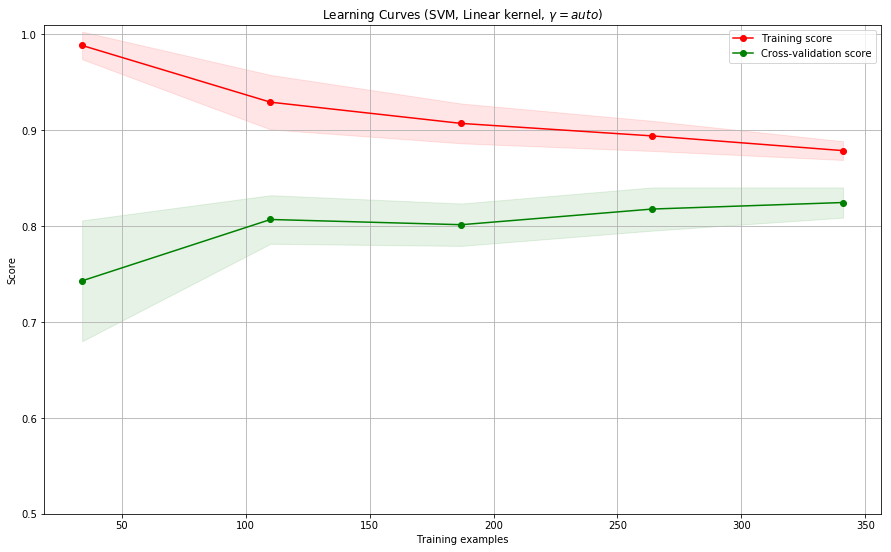

In [45]:
from sklearn.datasets import load_digits
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)  

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, 
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



title = "Learning Curves (SVM, Linear kernel, $\gamma=auto$)"
cv = ShuffleSplit(n_splits=5, test_size=0.3)
estimator = SVC(kernel='linear')

plot_learning_curve(estimator, title, X, y, (0.5, 1.01), cv=cv, n_jobs=15,)

In [46]:
from sklearn.svm import SVC

svc_rbf = SVC(kernel='rbf',C=1,gamma=0.2)
svc_rbf.fit(X_train,y_train)

predictions = svc_rbf.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[121   2]
 [ 25  14]]
             precision    recall  f1-score   support

          0       0.83      0.98      0.90       123
          1       0.88      0.36      0.51        39

avg / total       0.84      0.83      0.81       162



<module 'matplotlib.pyplot' from 'C:\\Users\\vinay\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

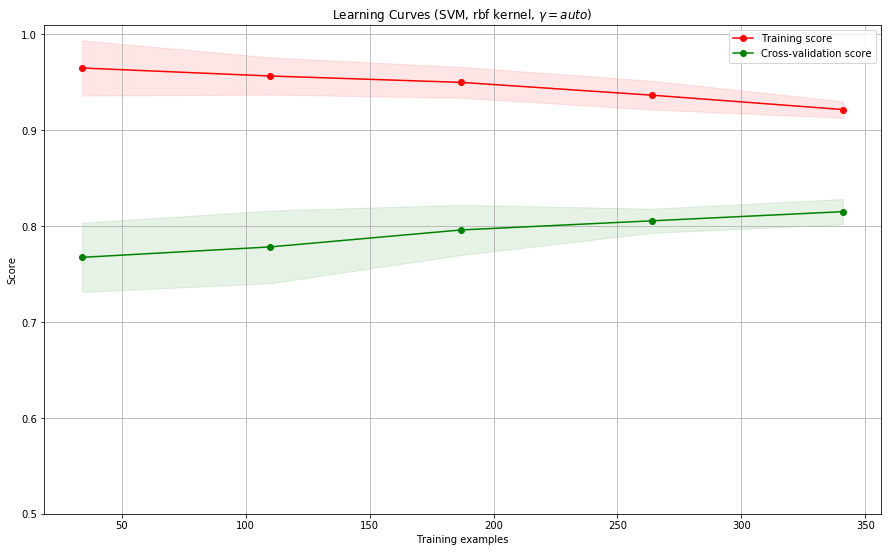

In [69]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



title = "Learning Curves (SVM, rbf kernel, $\gamma=auto$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.3)
estimator = SVC(kernel='rbf',C=1,gamma=0.2)

plot_learning_curve(estimator, title, X, y, (0.5, 1.01), cv=cv, n_jobs=15,)

In [56]:
from sklearn.svm import SVC
svm = SVC(kernel='poly', degree=2,C=5)
svm.fit(X_train, y_train)

predictions = svm.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[123   0]
 [ 28  11]]
             precision    recall  f1-score   support

          0       0.81      1.00      0.90       123
          1       1.00      0.28      0.44        39

avg / total       0.86      0.83      0.79       162



<module 'matplotlib.pyplot' from 'C:\\Users\\vinay\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

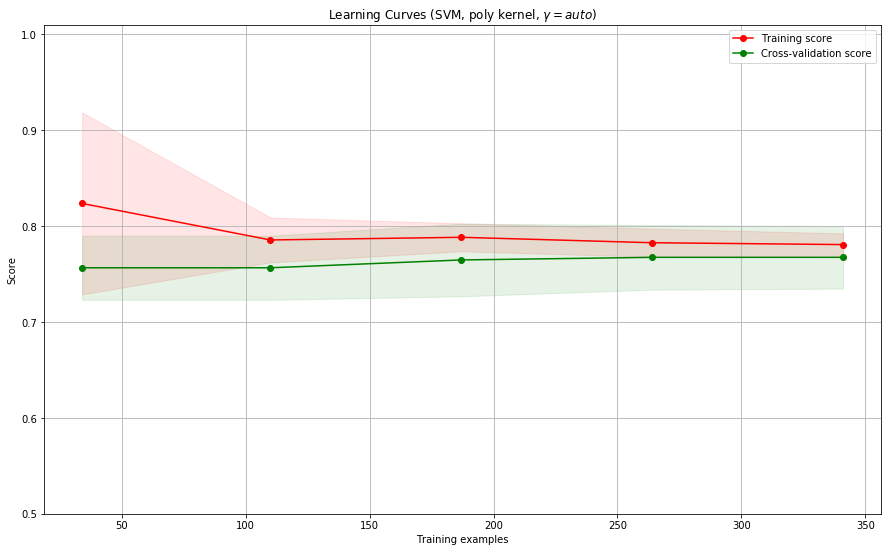

In [75]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



title = "Learning Curves (SVM, poly kernel, $\gamma=auto$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.3)
estimator = SVC(kernel='poly', degree=3,C=5)

plot_learning_curve(estimator, title, X, y, (0.5, 1.01), cv=cv, n_jobs=15,)

In [58]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini',max_depth=20)
tree.fit(X_train,y_train)
predictions = tree.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[96 27]
 [21 18]]
             precision    recall  f1-score   support

          0       0.82      0.78      0.80       123
          1       0.40      0.46      0.43        39

avg / total       0.72      0.70      0.71       162



<module 'matplotlib.pyplot' from 'C:\\Users\\vinay\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

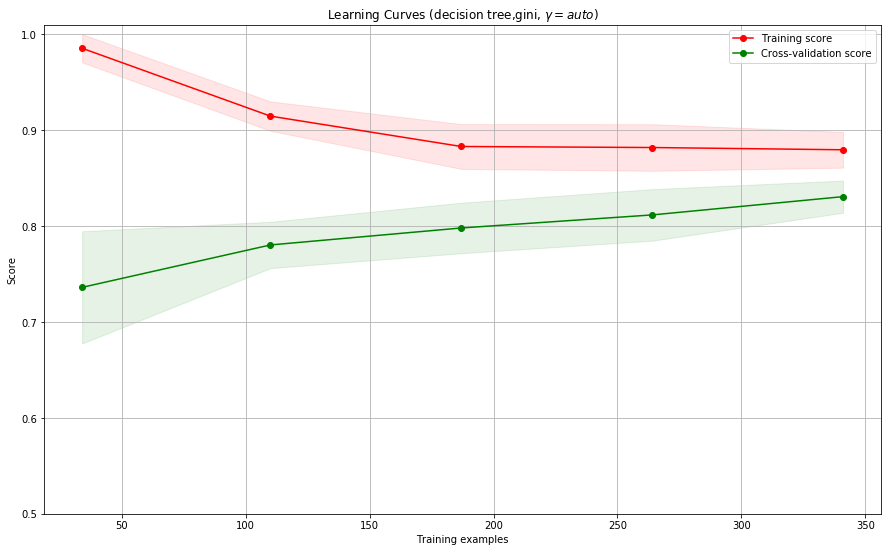

In [71]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



title = "Learning Curves (decision tree,gini, $\gamma=auto$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.3)
estimator = DecisionTreeClassifier(criterion='gini',max_depth=10,max_leaf_nodes=7)

plot_learning_curve(estimator, title, X, y, (0.5, 1.01), cv=cv, n_jobs=15,)

In [68]:
from sklearn.ensemble import AdaBoostClassifier 
tree = DecisionTreeClassifier(max_depth=30) 
clf = AdaBoostClassifier(n_estimators=3, base_estimator=DecisionTreeClassifier(criterion='gini',max_depth=10,max_leaf_nodes=7),learning_rate=1)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[90 33]
 [20 19]]
             precision    recall  f1-score   support

          0       0.82      0.73      0.77       123
          1       0.37      0.49      0.42        39

avg / total       0.71      0.67      0.69       162



<module 'matplotlib.pyplot' from 'C:\\Users\\vinay\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

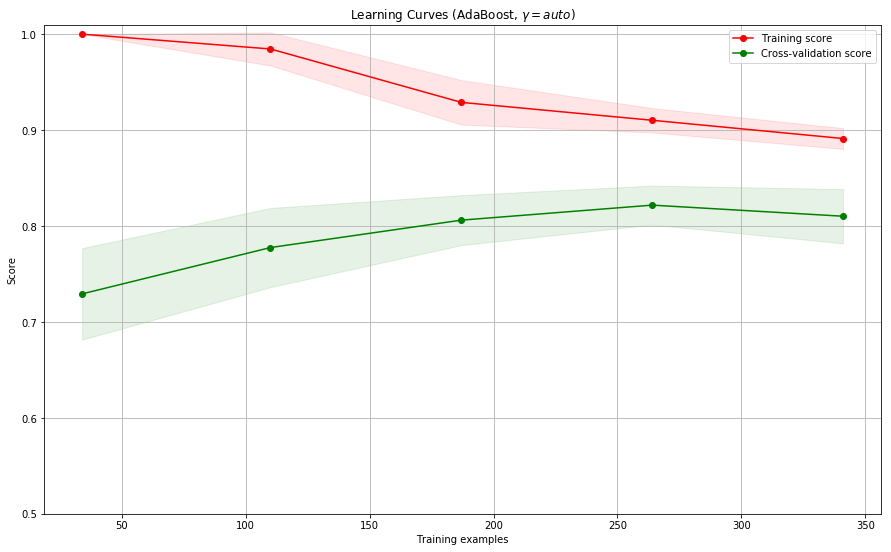

In [72]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



title = "Learning Curves (AdaBoost, $\gamma=auto$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.3)
estimator = AdaBoostClassifier(n_estimators=3, base_estimator=DecisionTreeClassifier(criterion='gini',max_depth=10,max_leaf_nodes=7),learning_rate=1)

plot_learning_curve(estimator, title, X, y, (0.5, 1.01), cv=cv, n_jobs=15,)